In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv") 
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
data.shape

(1000, 40)

This data set is about whether or not a fraud insurance claim has occurred. There are 1000 rows and 40 columns inside it.

we have to predict fraud_reported in this

In [4]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 no useful for our project

In [5]:
data = data.drop(columns=['_c39'])
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [8]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
for column in data.columns:
    unique_count = data[column].nunique()
    print(column,"==", unique_count)

months_as_customer == 391
age == 46
policy_number == 1000
policy_bind_date == 951
policy_state == 3
policy_csl == 3
policy_deductable == 3
policy_annual_premium == 991
umbrella_limit == 11
insured_zip == 995
insured_sex == 2
insured_education_level == 7
insured_occupation == 14
insured_hobbies == 20
insured_relationship == 6
capital-gains == 338
capital-loss == 354
incident_date == 60
incident_type == 4
collision_type == 4
incident_severity == 4
authorities_contacted == 5
incident_state == 7
incident_city == 7
incident_location == 1000
incident_hour_of_the_day == 24
number_of_vehicles_involved == 4
property_damage == 3
bodily_injuries == 3
witnesses == 4
police_report_available == 3
total_claim_amount == 763
injury_claim == 638
property_claim == 626
vehicle_claim == 726
auto_make == 14
auto_model == 39
auto_year == 21
fraud_reported == 2


In [10]:
#### not useful for our prediction

data = data.drop(columns=['policy_number','incident_location'])
data.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   
1       other-relative              0             0    21-01-2015   
2            own-child          35100             0    22-02-2015   
3            unmarried          48900        -62400    10-01-2015   
4            unmarried          66000        -46000    17-02-2015   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  
0       2004              Y  
1       2007              Y  
2       2007              N  
3       2014              Y  
4       20

In [11]:
### let's convert datetime
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

In [13]:
#### For policy_bind_date
data['day'] = data['policy_bind_date'].dt.day
data['month'] = data['policy_bind_date'].dt.month
data['year'] = data['policy_bind_date'].dt.year

#### For incident_date
data['day1'] = data['incident_date'].dt.day
data['month2'] = data['incident_date'].dt.month
data['year3'] = data['incident_date'].dt.year

data.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   
2                 134   29       2000-06-09           OH    100/300   
3                 256   41       1990-05-25           IL    250/500   
4                 228   44       2014-06-06           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    2015-01-25   
1       other-relative              0             0    2015-01-21   
2            own-child          35100             0    2015-02-22   
3            unmarried          48900        -62400    2015-10-01   
4            unmarried          66000        -46000    2015-02-17   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  day  month  year  day1  month2  year3  
0       2004              Y   17     10  2014    25       1   2015  
1       2007          

In [14]:
data.shape

(1000, 43)

In [15]:
data = data.drop(columns=['policy_bind_date','incident_date'])

In [16]:
### encode the columns
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['fraud_reported','auto_model','auto_make','police_report_available','property_damage',
               'incident_city','incident_state','authorities_contacted','incident_severity','collision_type',
               'incident_type','insured_relationship','insured_hobbies','insured_occupation','insured_education_level',
               'insured_sex','policy_csl','policy_state']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
print(data.head())


   months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48           2.0         1.0               1000   
1                 228   42           1.0         1.0               2000   
2                 134   29           2.0         0.0               2000   
3                 256   41           0.0         1.0               2000   
4                 228   44           0.0         2.0               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132          1.0   
1                1197.22         5000000       468176          1.0   
2                1413.14         5000000       430632          0.0   
3                1415.74         6000000       608117          0.0   
4                1583.91         6000000       610706          1.0   

   insured_education_level  insured_occupation  insured_hobbies  \
0                      4.0                 2.0             17

In [17]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                

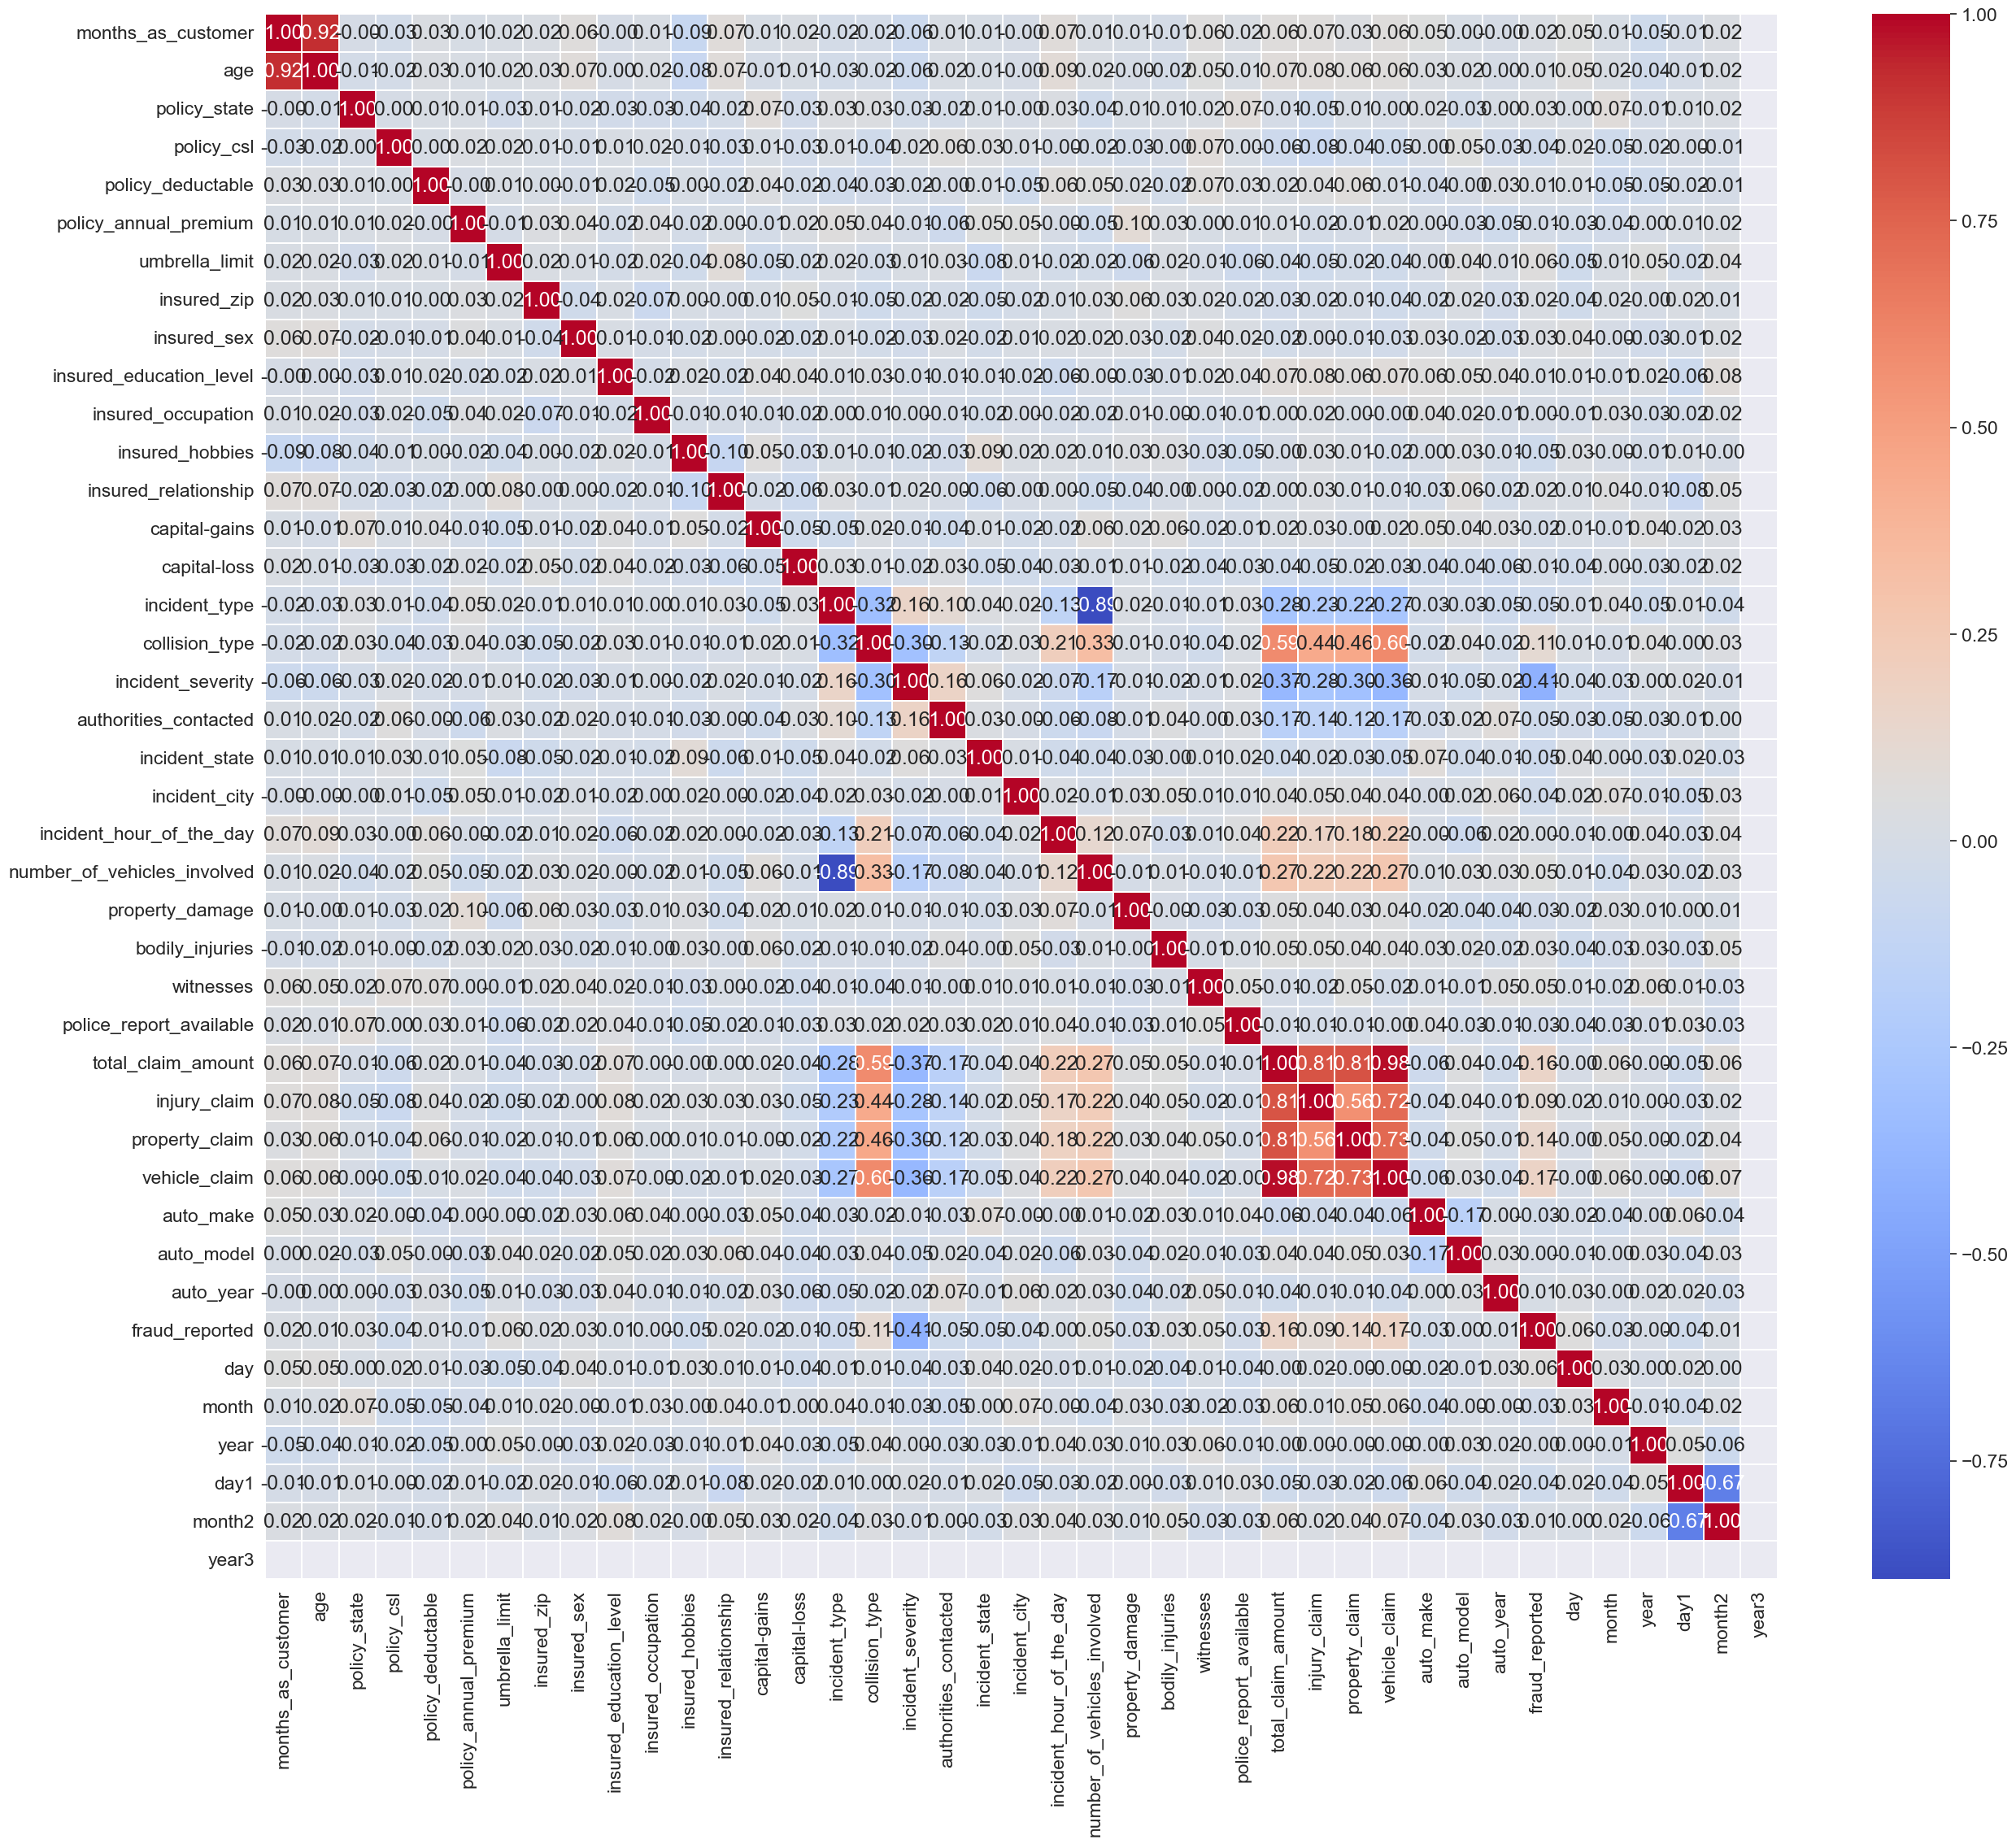

In [18]:
plt.figure(figsize = (30,25))
sns.set(font_scale = 1.5)
sns.heatmap(data.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

In [19]:
corr_data = data.corr()

In [20]:
corr_data['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
day1                          -0.044151
incident_city                 -0.040403
policy_csl                    -0.037190
month                         -0.030829
property_damage               -0.030497
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
year                          -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
month2                         0.014495
policy_deductable              0.014817
insured_zip                    0.019368


##### year, auto_model, insured_occupation, incident_hour_of_the_day, auto_year, insured_education_level and year3 these features do not have much correlation with the label So I will remove them.        

In [21]:
columns_to_drop = ['auto_model','insured_occupation','incident_hour_of_the_day','auto_year','insured_education_level']

data = data.drop(columns=columns_to_drop)


In [22]:
data = data.drop(columns=['year3','year'])

In [23]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'fraud_reported', 'day', 'month', 'day1', 'month2'],
      dtype='object')

In [24]:
data.shape

(1000, 34)

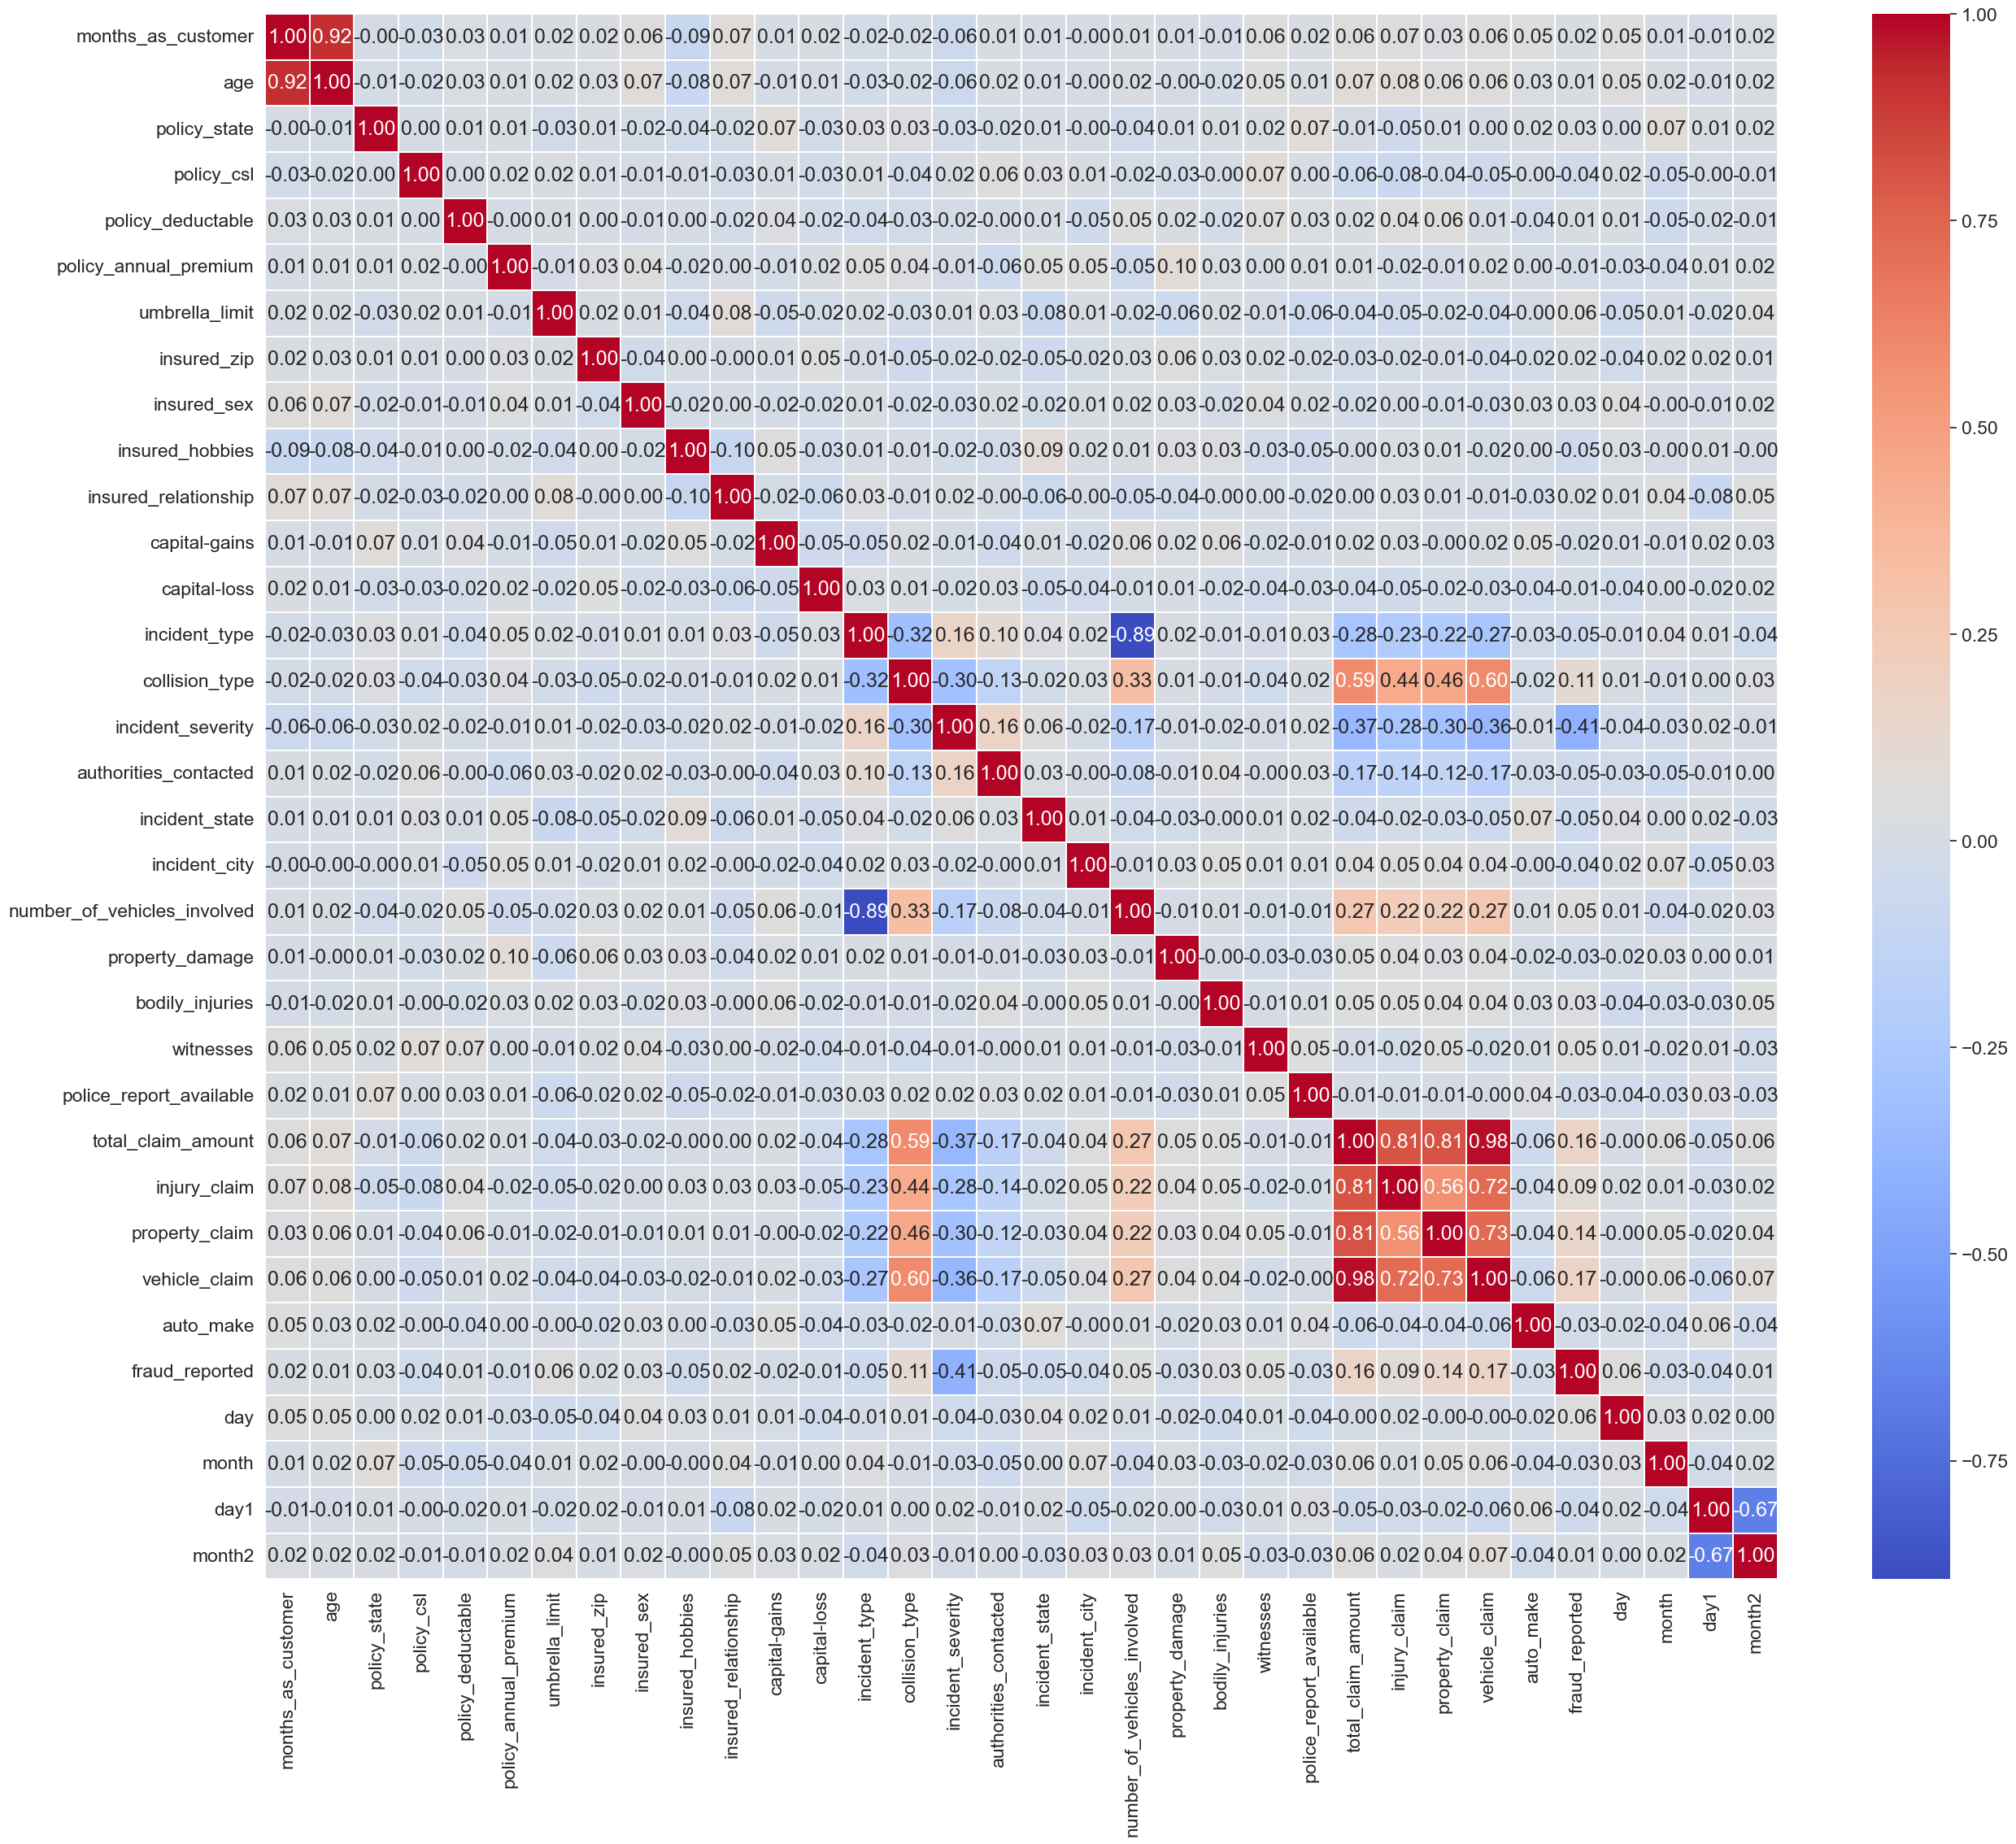

In [25]:
plt.figure(figsize = (30,25))
sns.set(font_scale = 1.5)
sns.heatmap(data.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

##### There is issue of multicollinearity in many features here 
eg: age and months_as_customer,
    number_of_vehicles_involved and incident_type,
    total_claim_amount and injury_claim,
    total_claim_amount and property_claim,
    total_claim_amount and vehicle_claim
    
##### i will remove injury_claim , property_claim , vehicle_claim  , incident_type , age    

In [26]:
data = data.drop(columns=['age','injury_claim','property_claim','vehicle_claim','incident_type'])

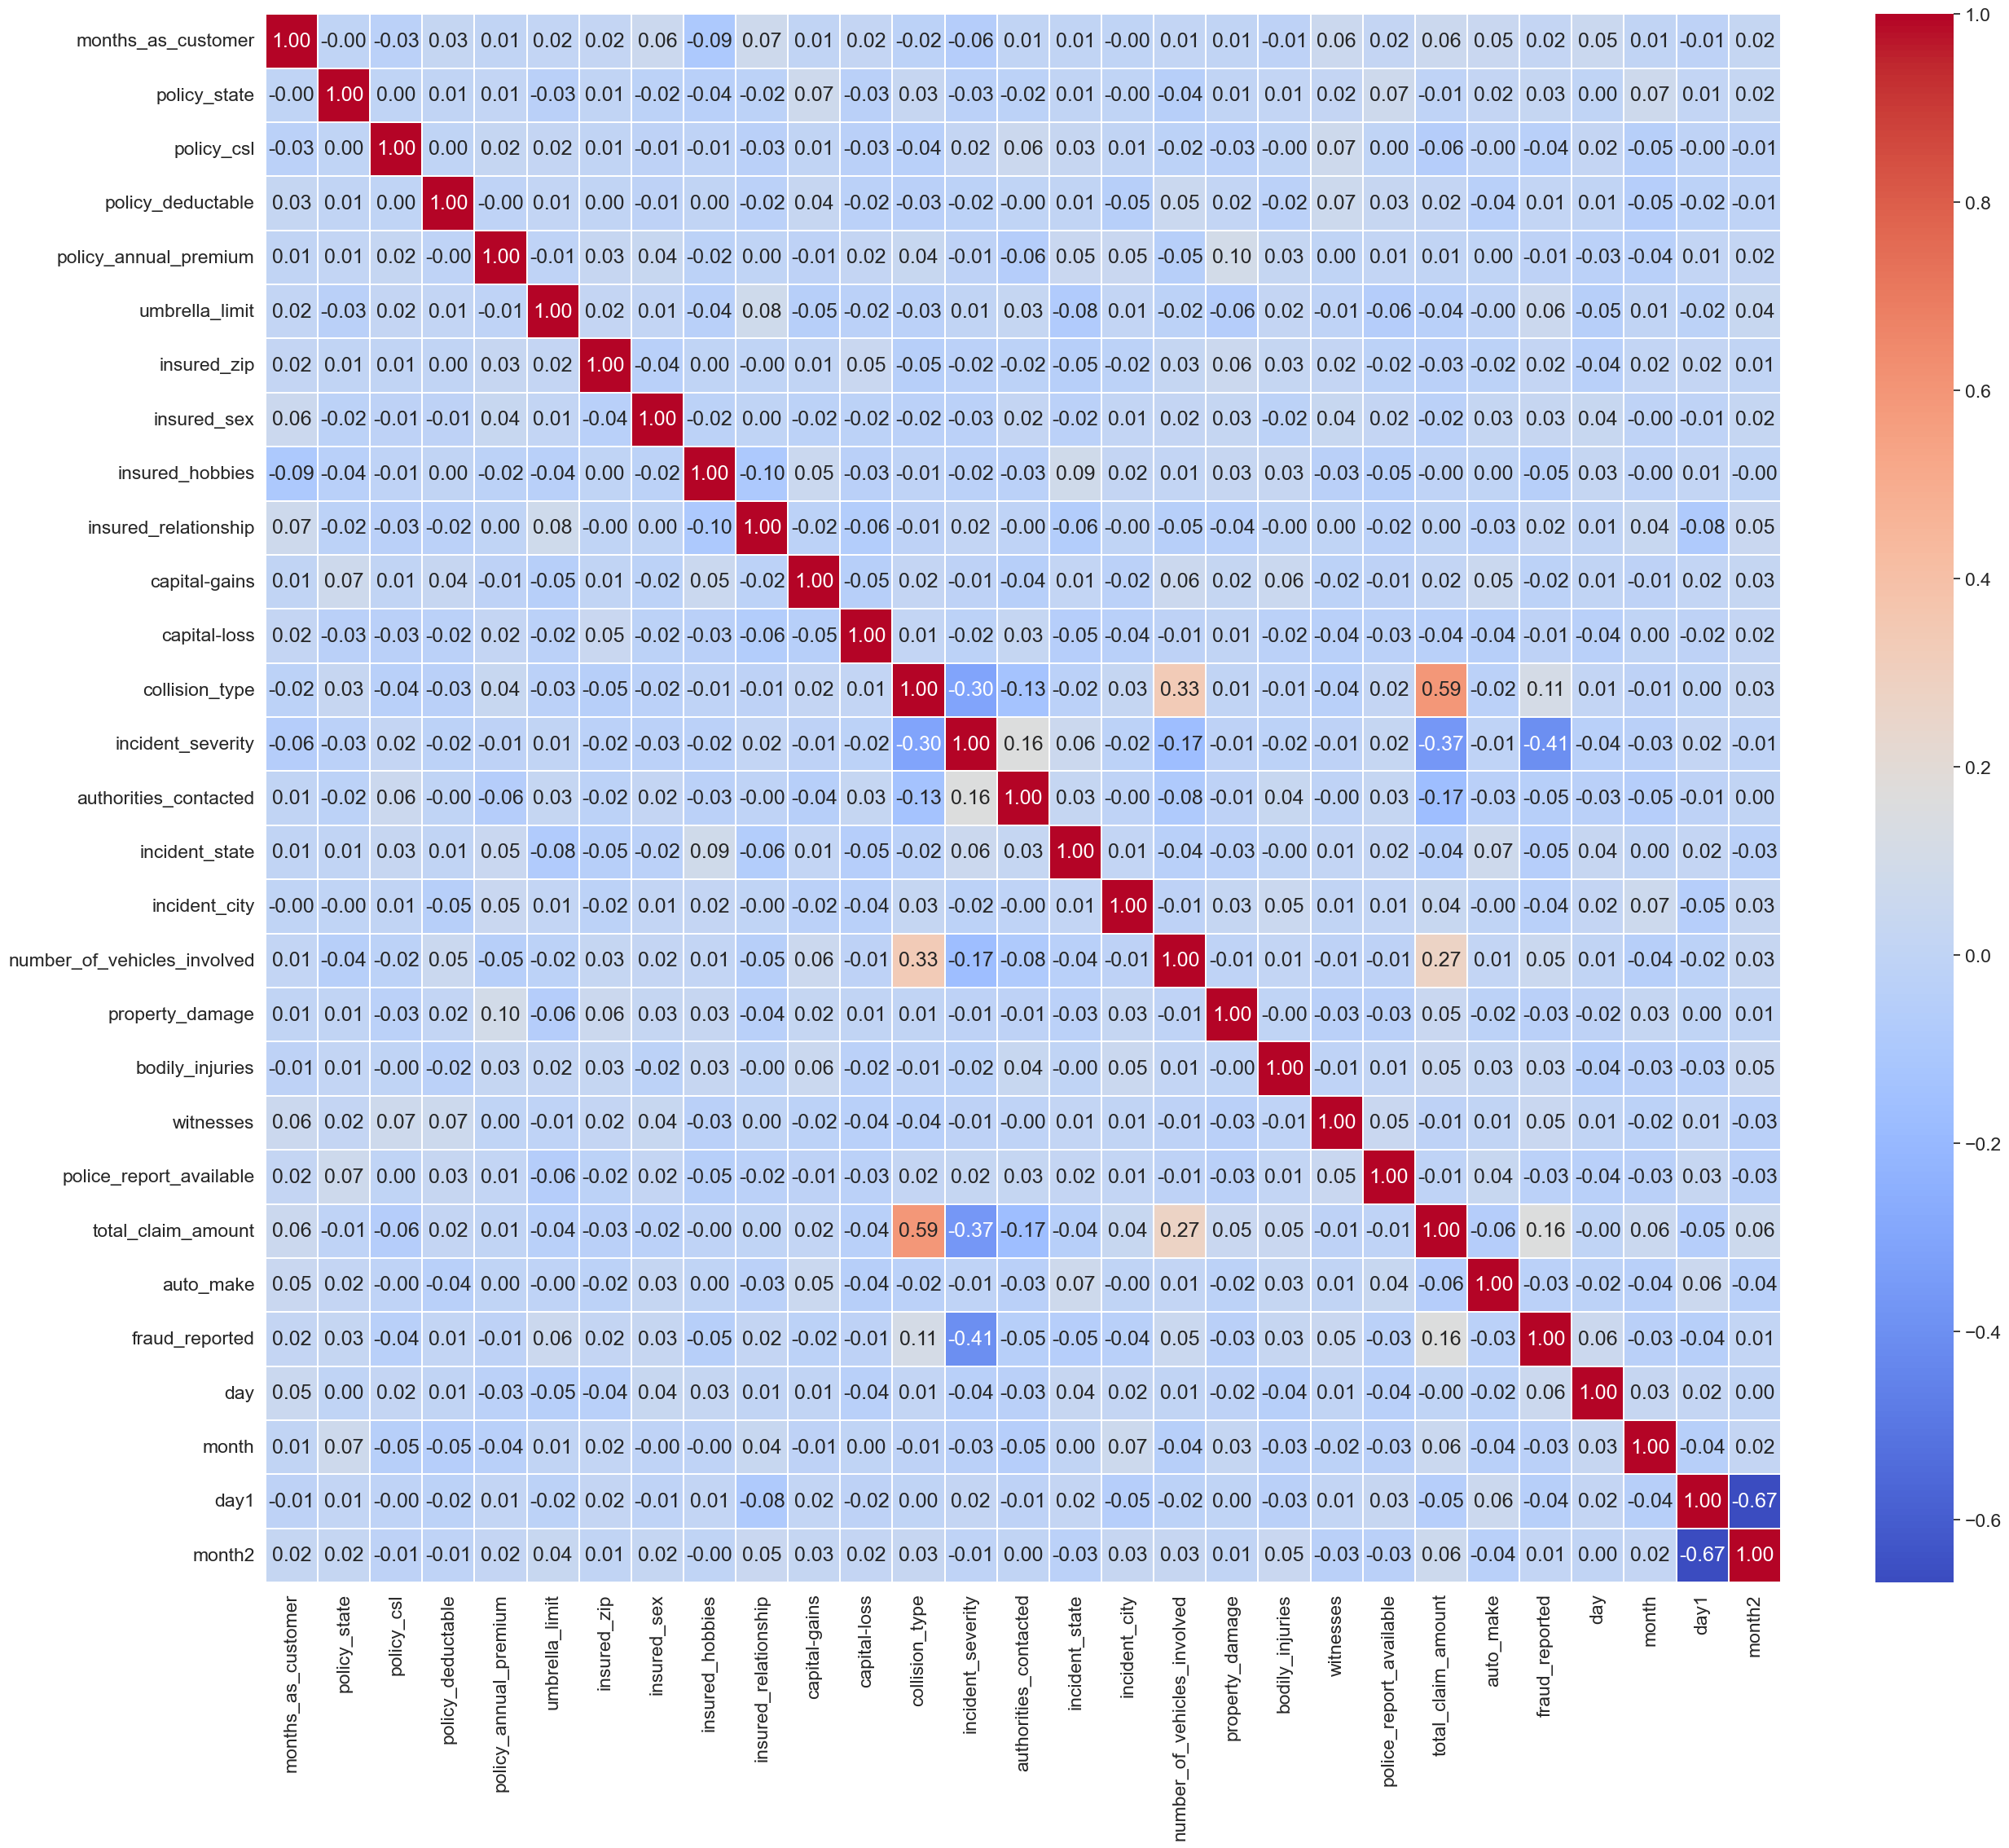

In [27]:
plt.figure(figsize = (30,25))
sns.set(font_scale = 1.5)
sns.heatmap(data.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

In [28]:
#### Now there is no multicollinearity

In [29]:
for column in data.columns:
    unique_count = data[column].nunique()
    print(column,"==", unique_count)

months_as_customer == 391
policy_state == 3
policy_csl == 3
policy_deductable == 3
policy_annual_premium == 991
umbrella_limit == 11
insured_zip == 995
insured_sex == 2
insured_hobbies == 20
insured_relationship == 6
capital-gains == 338
capital-loss == 354
collision_type == 4
incident_severity == 4
authorities_contacted == 5
incident_state == 7
incident_city == 7
number_of_vehicles_involved == 4
property_damage == 3
bodily_injuries == 3
witnesses == 4
police_report_available == 3
total_claim_amount == 763
auto_make == 14
fraud_reported == 2
day == 31
month == 12
day1 == 22
month2 == 12


##### We will look for outliers in continuous data.

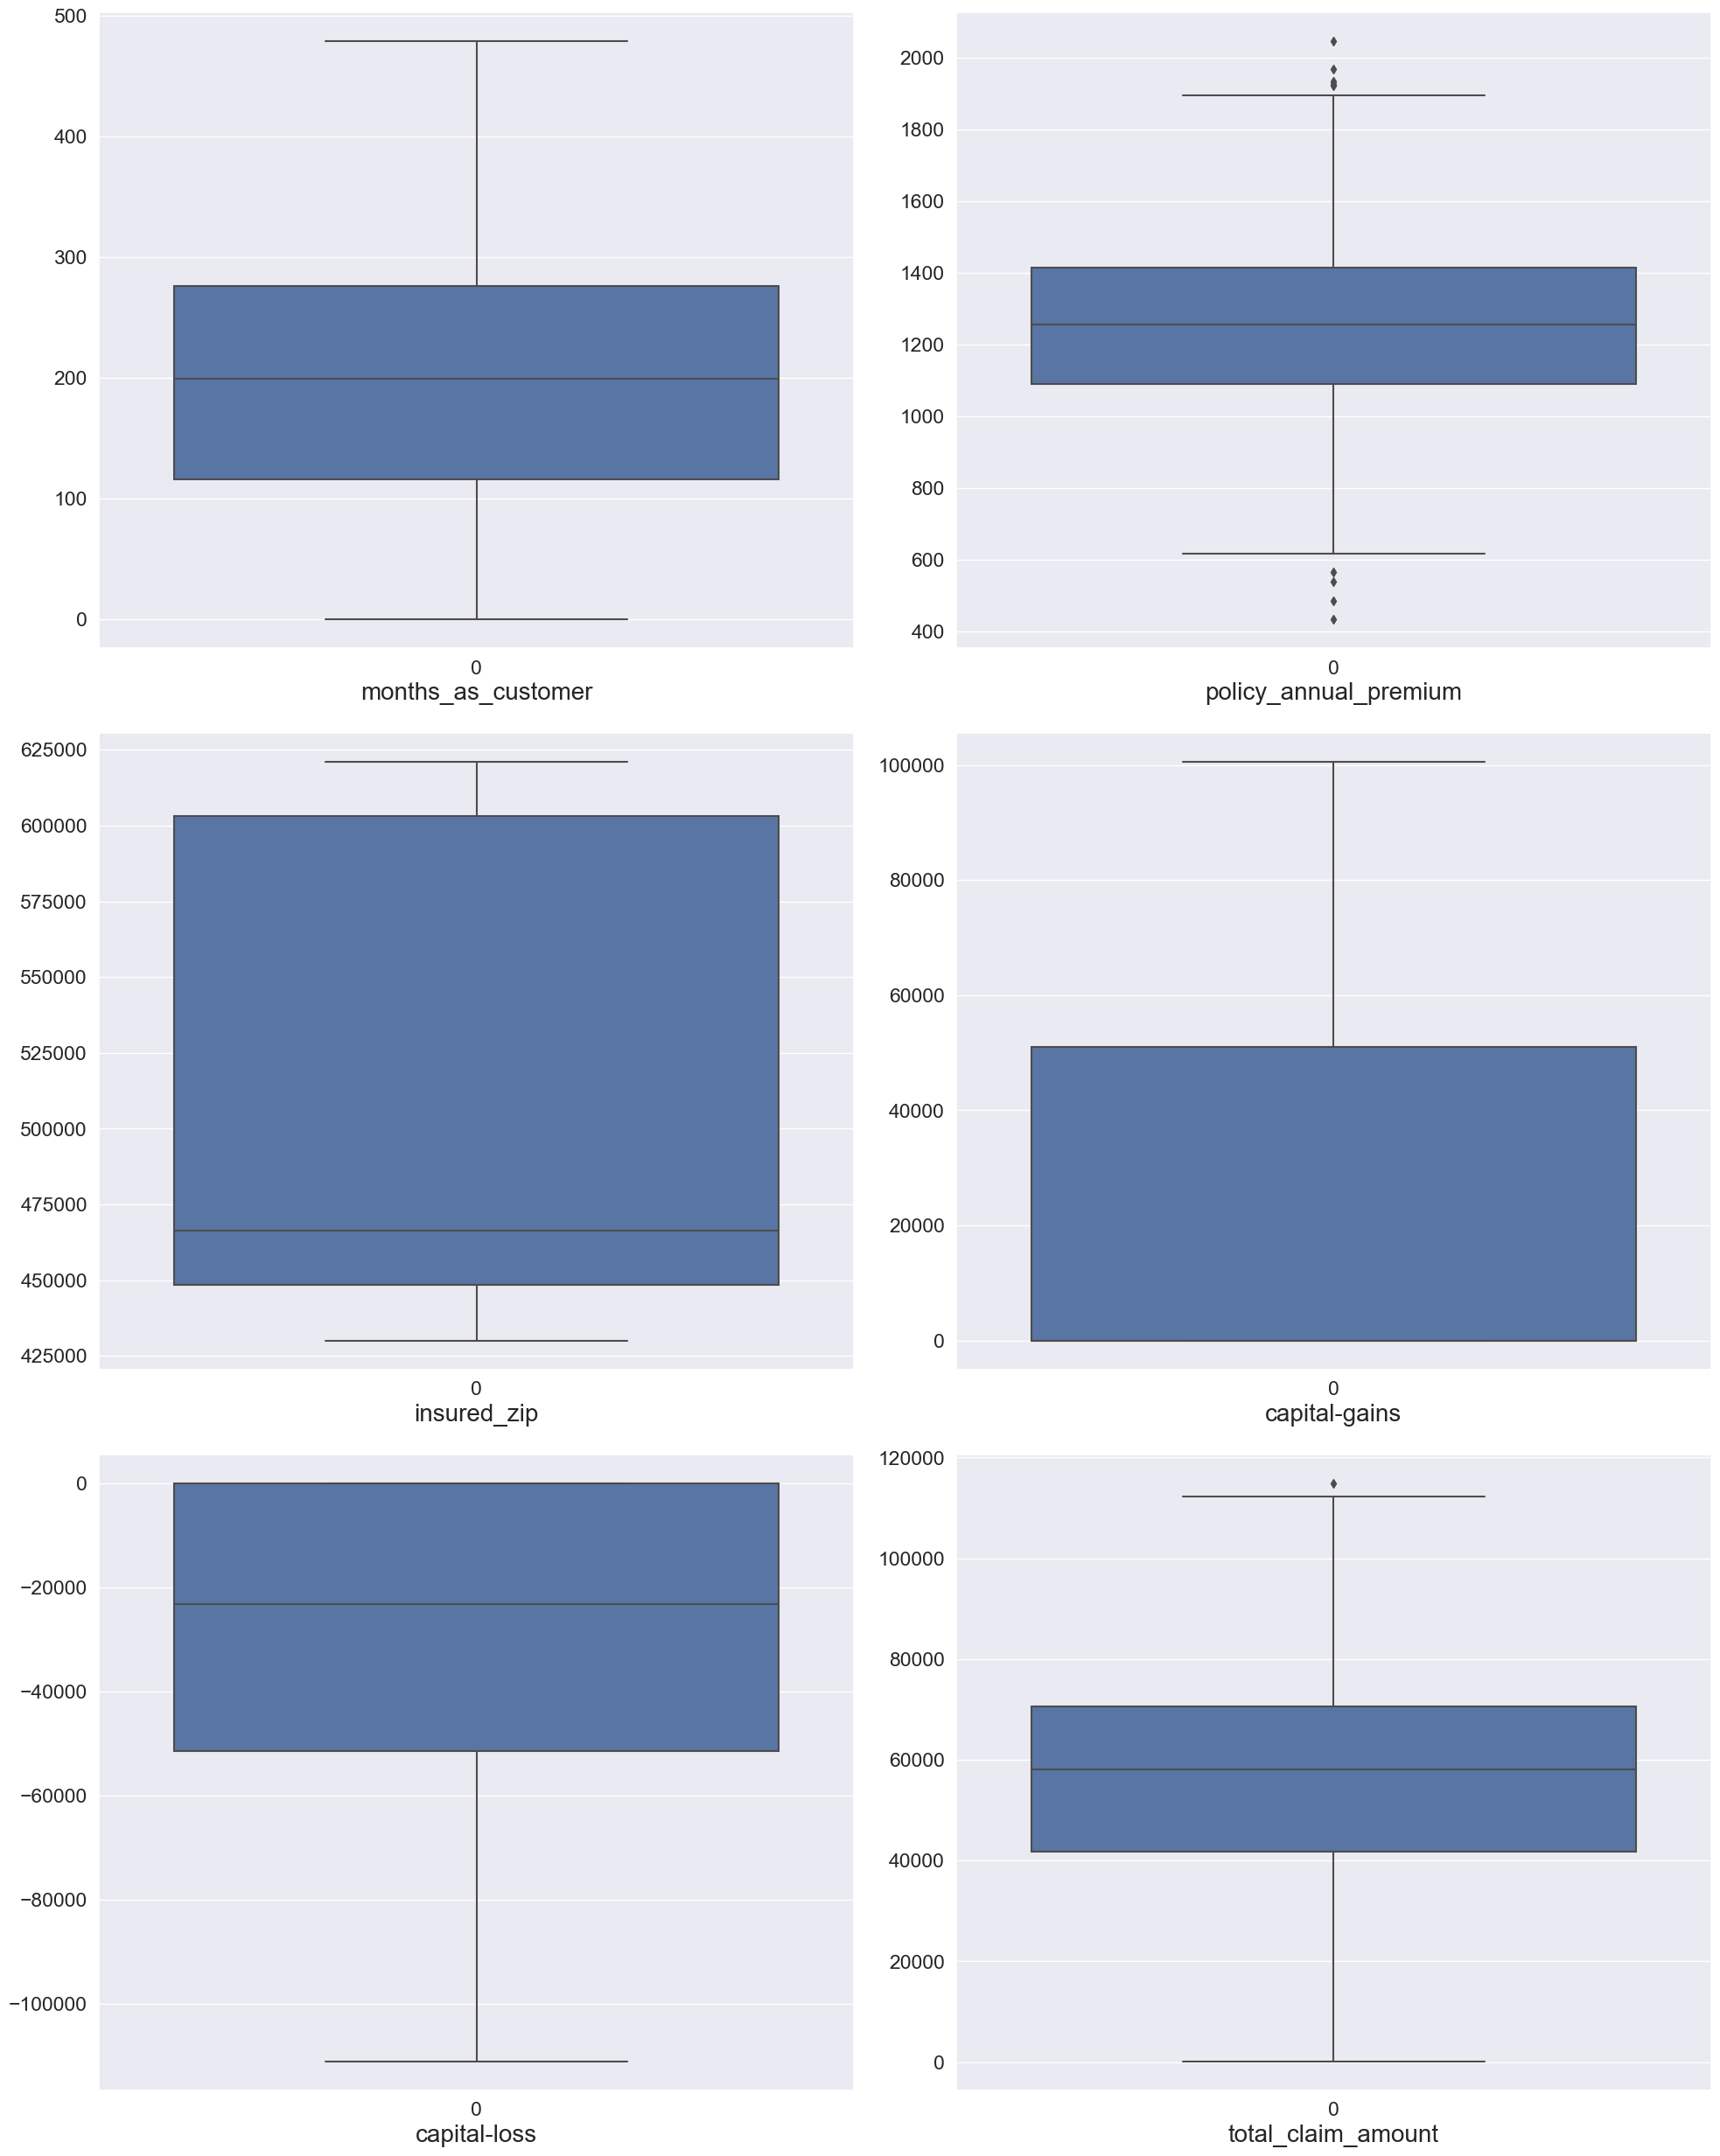

In [30]:
columns_to_plot = ['months_as_customer', 'policy_annual_premium', 'insured_zip',
                   'capital-gains', 'capital-loss', 'total_claim_amount']

plt.figure(figsize=(20, 25))
graph = 1
for column in columns_to_plot:
    if graph <= 6:
        plt.subplot(3, 2, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


#### policy_annual_premium and total_claim_amount has outliers

#### Find the IQR to identify outliers

In [31]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [32]:
#### higher side outlier
pap_high = (q3['policy_annual_premium'] + (1.5* iqr['policy_annual_premium']))
print(pap_high)

pap_index= np.where(data['policy_annual_premium']> pap_high) 
print (pap_index)

data = data.drop(data.index[pap_index])
print (data.shape ) 

data.reset_index()

1904.8262500000003
(array([133, 229, 544, 747, 796], dtype=int64),)
(995, 29)


index  months_as_customer  policy_state  policy_csl  policy_deductable  \
0        0                 328           2.0         1.0               1000   
1        1                 228           1.0         1.0               2000   
2        2                 134           2.0         0.0               2000   
3        3                 256           0.0         1.0               2000   
4        4                 228           0.0         2.0               1000   
..     ...                 ...           ...         ...                ...   
990    995                   3           2.0         2.0               1000   
991    996                 285           0.0         0.0               1000   
992    997                 130           2.0         1.0                500   
993    998                 458           0.0         2.0               2000   
994    999                 456           2.0         1.0               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132          1.0   
1                  1197.22         5000000       468176          1.0   
2                  1413.14         5000000       430632          0.0   
3                  1415.74         6000000       608117          0.0   
4                  1583.91         6000000       610706          1.0   
..                     ...             ...          ...          ...   
990                1310.80               0       431289          0.0   
991                1436.79               0       608177          0.0   
992                1383.49         3000000       442797          0.0   
993                1356.92         5000000       441714          1.0   
994                 766.19               0       612260          0.0   

     insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0               17.0                   0.0          53300             0   
1               15.0                   2.0              0             0   
2                2.0                   3.0          35100             0   
3                2.0                   4.0          48900        -62400   
4                2.0                   4.0          66000        -46000   
..               ...                   ...            ...           ...   
990             13.0                   4.0              0             0   
991             17.0                   5.0          70900             0   
992              3.0                   2.0          35100             0   
993              0.0                   5.0              0             0   
994             11.0                   0.0              0             0   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0               3.0                0.0                    4.0             4.0   
1               0.0                1.0                    4.0             5.0   
2               2.0                1.0                    4.0             1.0   
3               1.0                0.0                    4.0             2.0   
4               0.0                1.0                    2.0             1.0   
..              ...                ...                    ...             ...   
990             1.0                1.0                    1.0             0.0   
991             2.0                0.0                    1.0             4.0   
992             3.0                1.0                    4.0             0.0   
993             2.0                0.0                    3.0             1.0   
994             0.0                1.0                    4.0             6.0   

     incident_city  number_of_vehicles_involved  property_damage  \
0              1.0                            1              2.0   
1              5.0                            1              0.0   
2              1.0                            3              1.0   
3              0.0                           

In [33]:
#### higher side outlier
tca_high = (q3['total_claim_amount'] + (1.5* iqr['total_claim_amount']))
print(tca_high)

tca_index= np.where(data['total_claim_amount']> tca_high) 
print (tca_index)

data = data.drop(data.index[tca_index])
print (data.shape ) 

data.reset_index()

113762.5
(array([11], dtype=int64),)
(994, 29)


index  months_as_customer  policy_state  policy_csl  policy_deductable  \
0        0                 328           2.0         1.0               1000   
1        1                 228           1.0         1.0               2000   
2        2                 134           2.0         0.0               2000   
3        3                 256           0.0         1.0               2000   
4        4                 228           0.0         2.0               1000   
..     ...                 ...           ...         ...                ...   
989    995                   3           2.0         2.0               1000   
990    996                 285           0.0         0.0               1000   
991    997                 130           2.0         1.0                500   
992    998                 458           0.0         2.0               2000   
993    999                 456           2.0         1.0               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132          1.0   
1                  1197.22         5000000       468176          1.0   
2                  1413.14         5000000       430632          0.0   
3                  1415.74         6000000       608117          0.0   
4                  1583.91         6000000       610706          1.0   
..                     ...             ...          ...          ...   
989                1310.80               0       431289          0.0   
990                1436.79               0       608177          0.0   
991                1383.49         3000000       442797          0.0   
992                1356.92         5000000       441714          1.0   
993                 766.19               0       612260          0.0   

     insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0               17.0                   0.0          53300             0   
1               15.0                   2.0              0             0   
2                2.0                   3.0          35100             0   
3                2.0                   4.0          48900        -62400   
4                2.0                   4.0          66000        -46000   
..               ...                   ...            ...           ...   
989             13.0                   4.0              0             0   
990             17.0                   5.0          70900             0   
991              3.0                   2.0          35100             0   
992              0.0                   5.0              0             0   
993             11.0                   0.0              0             0   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0               3.0                0.0                    4.0             4.0   
1               0.0                1.0                    4.0             5.0   
2               2.0                1.0                    4.0             1.0   
3               1.0                0.0                    4.0             2.0   
4               0.0                1.0                    2.0             1.0   
..              ...                ...                    ...             ...   
989             1.0                1.0                    1.0             0.0   
990             2.0                0.0                    1.0             4.0   
991             3.0                1.0                    4.0             0.0   
992             2.0                0.0                    3.0             1.0   
993             0.0                1.0                    4.0             6.0   

     incident_city  number_of_vehicles_involved  property_damage  \
0              1.0                            1              2.0   
1              5.0                            1              0.0   
2              1.0                            3              1.0   
3              0.0                           

In [34]:
####(Lower side outlier)

pa_low = (q1.policy_annual_premium - (1.5* iqr.policy_annual_premium)) 
print (pa_low)

pa_index= np.where(data['policy_annual_premium']< pa_low) 
print (pa_index)

data = data.drop(data.index[pa_index])
print (data.shape ) 

data.reset_index()

600.4762499999999
(array([ 42, 245, 677, 758], dtype=int64),)
(990, 29)


index  months_as_customer  policy_state  policy_csl  policy_deductable  \
0        0                 328           2.0         1.0               1000   
1        1                 228           1.0         1.0               2000   
2        2                 134           2.0         0.0               2000   
3        3                 256           0.0         1.0               2000   
4        4                 228           0.0         2.0               1000   
..     ...                 ...           ...         ...                ...   
985    995                   3           2.0         2.0               1000   
986    996                 285           0.0         0.0               1000   
987    997                 130           2.0         1.0                500   
988    998                 458           0.0         2.0               2000   
989    999                 456           2.0         1.0               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132          1.0   
1                  1197.22         5000000       468176          1.0   
2                  1413.14         5000000       430632          0.0   
3                  1415.74         6000000       608117          0.0   
4                  1583.91         6000000       610706          1.0   
..                     ...             ...          ...          ...   
985                1310.80               0       431289          0.0   
986                1436.79               0       608177          0.0   
987                1383.49         3000000       442797          0.0   
988                1356.92         5000000       441714          1.0   
989                 766.19               0       612260          0.0   

     insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0               17.0                   0.0          53300             0   
1               15.0                   2.0              0             0   
2                2.0                   3.0          35100             0   
3                2.0                   4.0          48900        -62400   
4                2.0                   4.0          66000        -46000   
..               ...                   ...            ...           ...   
985             13.0                   4.0              0             0   
986             17.0                   5.0          70900             0   
987              3.0                   2.0          35100             0   
988              0.0                   5.0              0             0   
989             11.0                   0.0              0             0   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0               3.0                0.0                    4.0             4.0   
1               0.0                1.0                    4.0             5.0   
2               2.0                1.0                    4.0             1.0   
3               1.0                0.0                    4.0             2.0   
4               0.0                1.0                    2.0             1.0   
..              ...                ...                    ...             ...   
985             1.0                1.0                    1.0             0.0   
986             2.0                0.0                    1.0             4.0   
987             3.0                1.0                    4.0             0.0   
988             2.0                0.0                    3.0             1.0   
989             0.0                1.0                    4.0             6.0   

     incident_city  number_of_vehicles_involved  property_damage  \
0              1.0                            1              2.0   
1              5.0                            1              0.0   
2              1.0                            3              1.0   
3              0.0                           

In [35]:
data.shape

(990, 29)

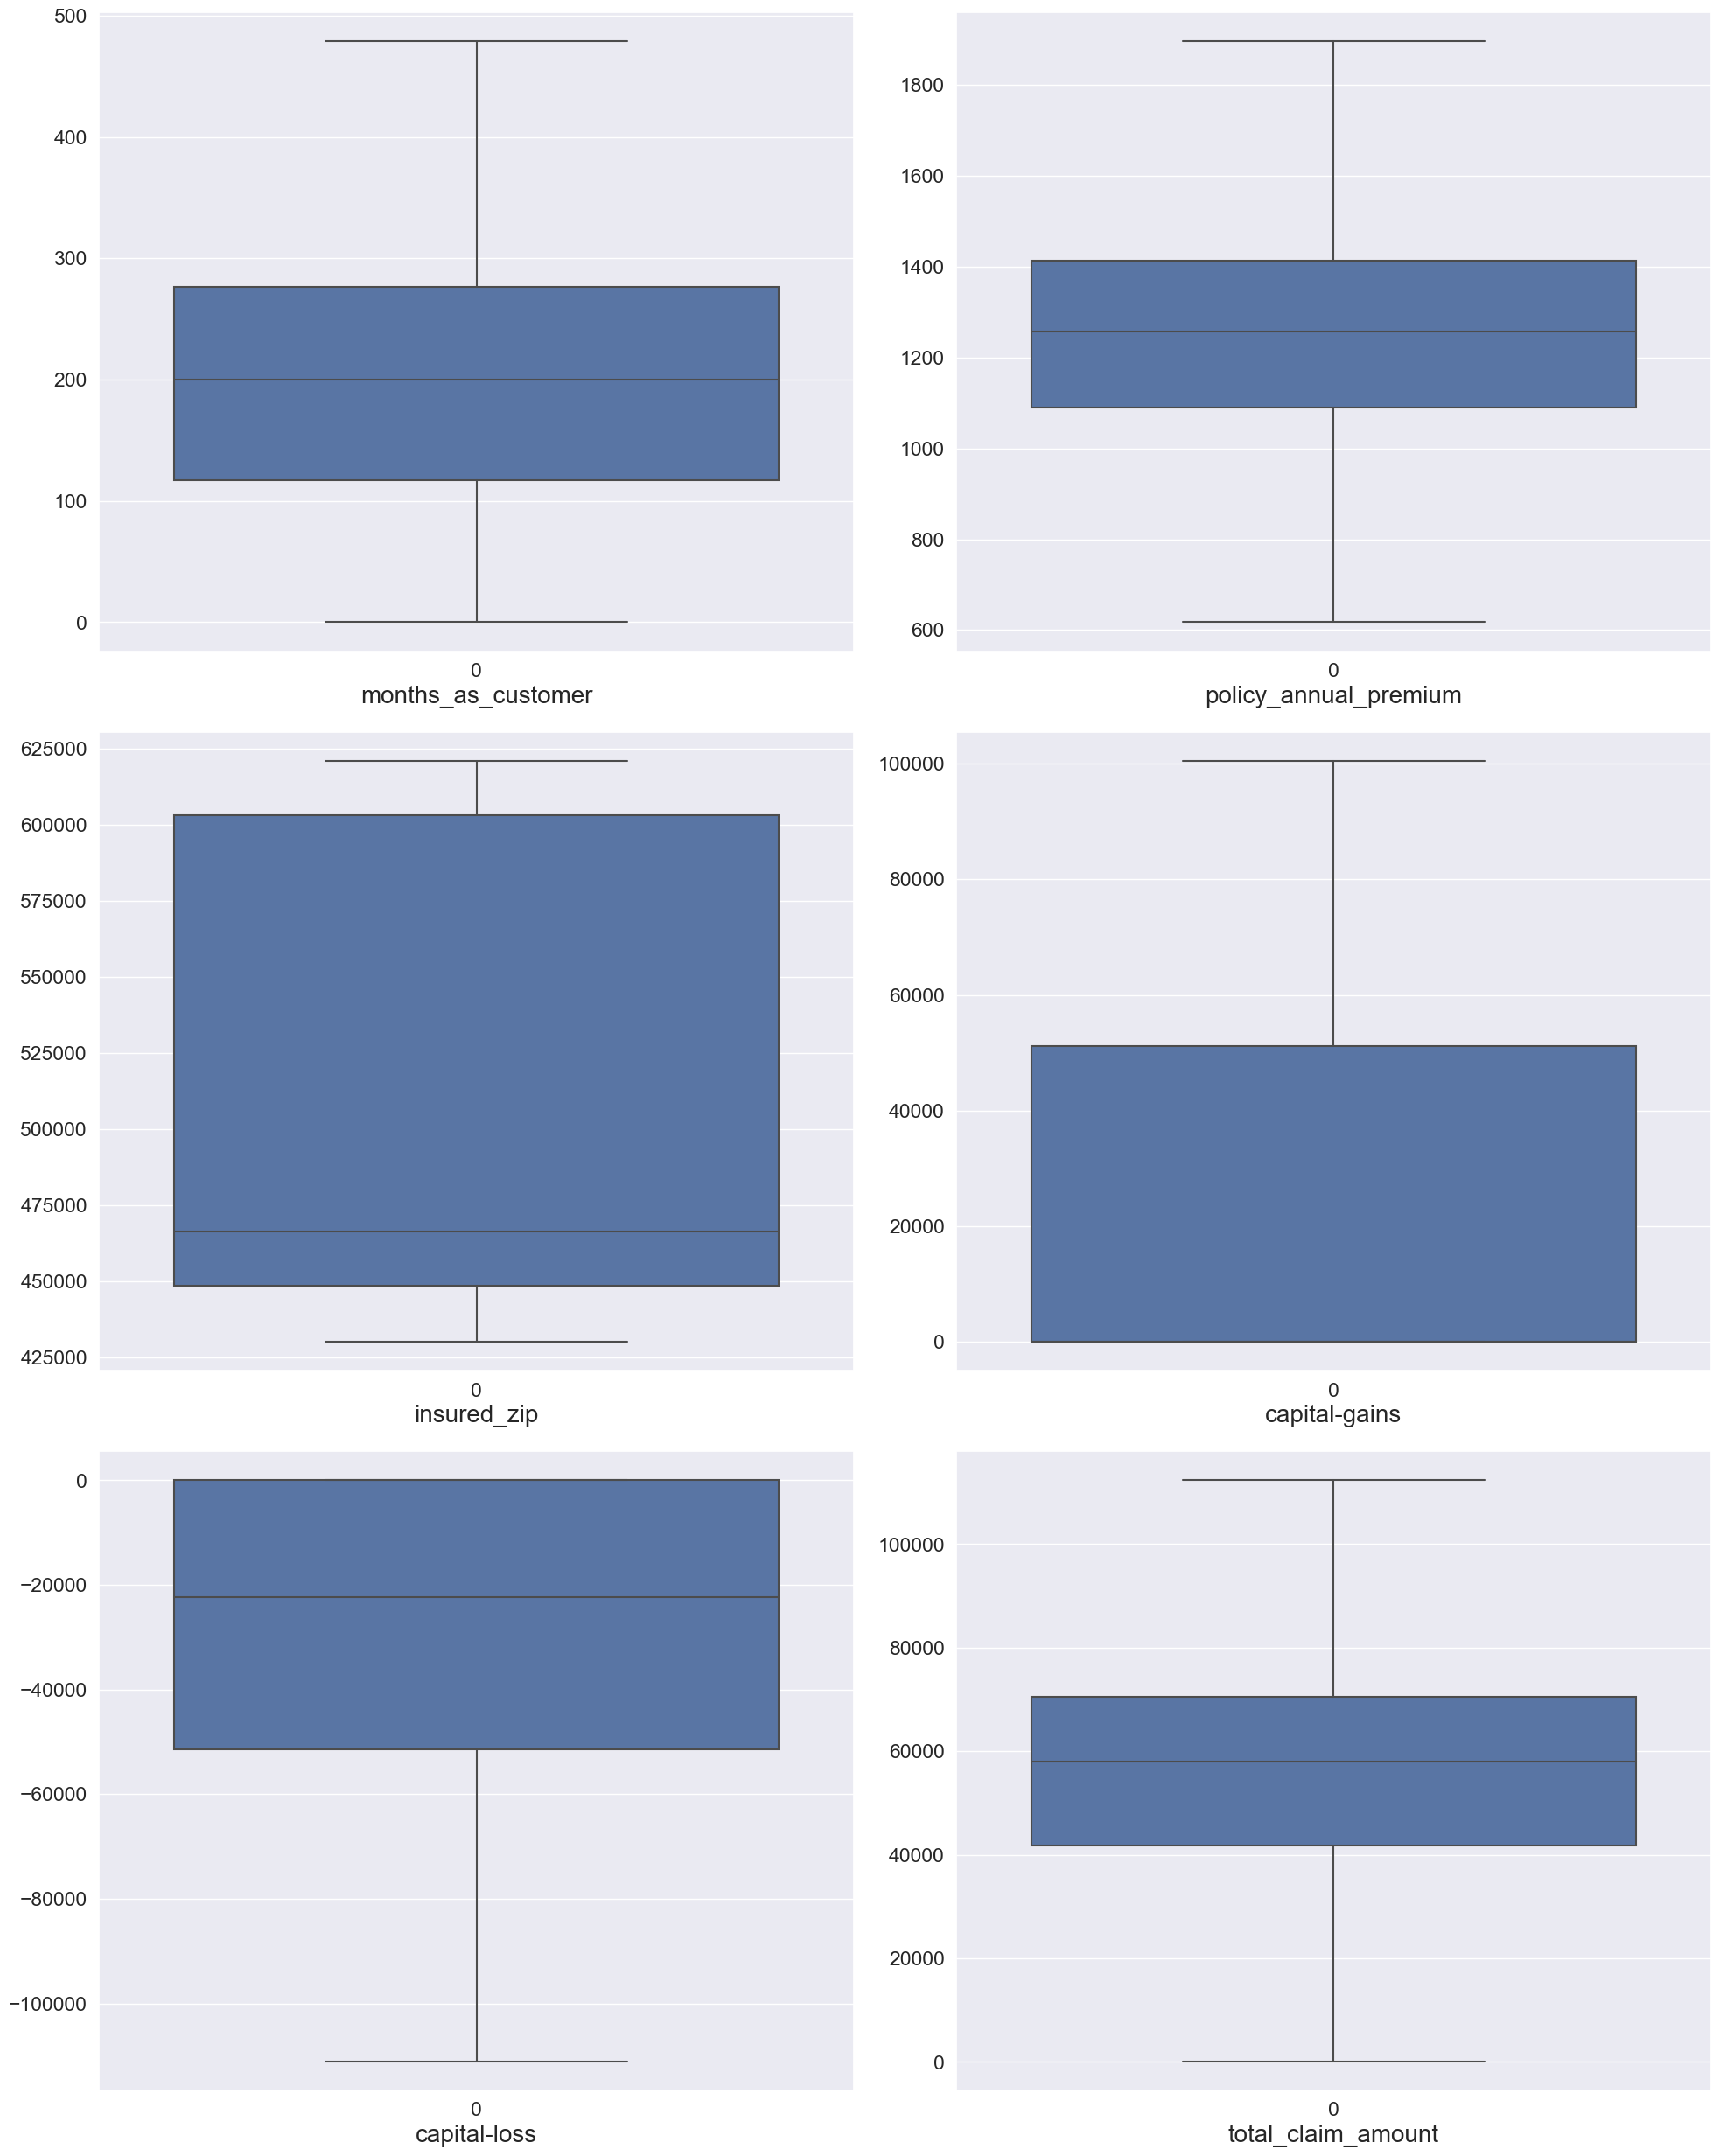

In [36]:
columns_to_plot = ['months_as_customer', 'policy_annual_premium', 'insured_zip',
                   'capital-gains', 'capital-loss', 'total_claim_amount']

plt.figure(figsize=(20, 25))
graph = 1
for column in columns_to_plot:
    if graph <= 6:
        plt.subplot(3, 2, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

#### now outlier removed

In [37]:
data.skew()

months_as_customer             0.356948
policy_state                  -0.032107
policy_csl                     0.089867
policy_deductable              0.473187
policy_annual_premium          0.006066
umbrella_limit                 1.806139
insured_zip                    0.827028
insured_sex                    0.146062
insured_hobbies               -0.049916
insured_relationship           0.081532
capital-gains                  0.472755
capital-loss                  -0.396771
collision_type                -0.195464
incident_severity              0.279530
authorities_contacted         -0.125012
incident_state                -0.145094
incident_city                  0.044076
number_of_vehicles_involved    0.499063
property_damage                0.103670
bodily_injuries                0.011184
witnesses                      0.023064
police_report_available        0.055419
total_claim_amount            -0.607020
auto_make                     -0.019362
fraud_reported                 1.178415


#### insured_zip (0.827028) and total_claim_amount(-0.607020) have skewness

In [38]:
data_copy = data.copy(deep = True)   

In [39]:
data_copy['insured_zip'] = np.cbrt(data_copy['insured_zip'])

data_copy['total_claim_amount'] = np.log1p(data_copy['total_claim_amount'])


In [40]:
data_copy.skew()

months_as_customer             0.356948
policy_state                  -0.032107
policy_csl                     0.089867
policy_deductable              0.473187
policy_annual_premium          0.006066
umbrella_limit                 1.806139
insured_zip                    0.804916
insured_sex                    0.146062
insured_hobbies               -0.049916
insured_relationship           0.081532
capital-gains                  0.472755
capital-loss                  -0.396771
collision_type                -0.195464
incident_severity              0.279530
authorities_contacted         -0.125012
incident_state                -0.145094
incident_city                  0.044076
number_of_vehicles_involved    0.499063
property_damage                0.103670
bodily_injuries                0.011184
witnesses                      0.023064
police_report_available        0.055419
total_claim_amount            -1.664300
auto_make                     -0.019362
fraud_reported                 1.178415


#### This has increased this skewness even more. so i will use another way.

In [41]:
from scipy.stats import boxcox

In [42]:
data_copy1 = data.copy(deep = True)   

In [43]:
data_copy1['insured_zip'] = np.log(data_copy1['insured_zip'])
data_copy1['total_claim_amount'], lambda_value = boxcox(data_copy1['total_claim_amount'] + 1)

# Adding 1 to handle zero values in the column before applying Box-Cox transformation


In [44]:
data_copy1.skew()

months_as_customer             0.356948
policy_state                  -0.032107
policy_csl                     0.089867
policy_deductable              0.473187
policy_annual_premium          0.006066
umbrella_limit                 1.806139
insured_zip                    0.792655
insured_sex                    0.146062
insured_hobbies               -0.049916
insured_relationship           0.081532
capital-gains                  0.472755
capital-loss                  -0.396771
collision_type                -0.195464
incident_severity              0.279530
authorities_contacted         -0.125012
incident_state                -0.145094
incident_city                  0.044076
number_of_vehicles_involved    0.499063
property_damage                0.103670
bodily_injuries                0.011184
witnesses                      0.023064
police_report_available        0.055419
total_claim_amount            -0.516023
auto_make                     -0.019362
fraud_reported                 1.178415


In [45]:
#### one more try

In [46]:
data_copy2 = data.copy(deep = True)   

In [47]:
data_copy2['total_claim_amount'], lambda_value = boxcox(data_copy2['total_claim_amount'] + 1)
data_copy2['insured_zip'], lambda_value = boxcox(data_copy2['insured_zip'] + 1)

In [48]:
data_copy2.skew()

months_as_customer             0.356948
policy_state                  -0.032107
policy_csl                     0.089867
policy_deductable              0.473187
policy_annual_premium          0.006066
umbrella_limit                 1.806139
insured_zip                    0.000000
insured_sex                    0.146062
insured_hobbies               -0.049916
insured_relationship           0.081532
capital-gains                  0.472755
capital-loss                  -0.396771
collision_type                -0.195464
incident_severity              0.279530
authorities_contacted         -0.125012
incident_state                -0.145094
incident_city                  0.044076
number_of_vehicles_involved    0.499063
property_damage                0.103670
bodily_injuries                0.011184
witnesses                      0.023064
police_report_available        0.055419
total_claim_amount            -0.516023
auto_make                     -0.019362
fraud_reported                 1.178415


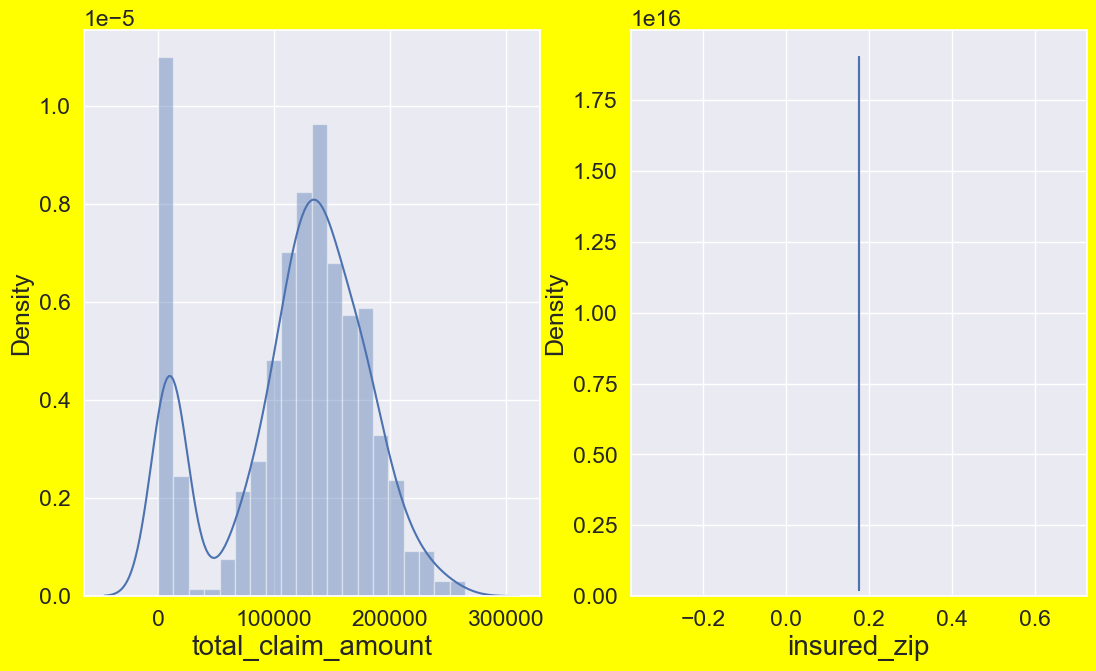

In [49]:
skew_columns = ['total_claim_amount','insured_zip']


plt.figure(figsize=(20,25), facecolor='yellow') 
plotnumber= 1

for column in skew_columns:
    if plotnumber<=9:        
        ax = plt.subplot(3,3,plotnumber) 
        sns.distplot(data_copy2[column]) 
        plt.xlabel(column, fontsize=20)



    plotnumber+=1
plt.show()

#### now it is better

In [50]:
data['total_claim_amount'], lambda_value = boxcox(data['total_claim_amount'] + 1)
data['insured_zip'], lambda_value = boxcox(data['insured_zip'] + 1)


In [51]:
### model bulding

In [52]:
X = data_copy.drop(columns = ['fraud_reported']) 
y = data_copy['fraud_reported']                  

In [53]:
y.value_counts()

0.0    746
1.0    244
Name: fraud_reported, dtype: int64

In [54]:
#### data balnced

In [55]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(X)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20, random_state= 100)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred_train = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
        print('\nTrain Confusion Matrix:')
        print(confusion_matrix(y_train, y_pred_train))
        
    elif not train:
        y_pred_test = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
        print('\nTest Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred_test))
        print('\nTest Classification Report:')
        print(classification_report(y_test, y_pred_test, digits=2))

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### LogisticRegression

In [59]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [60]:
metric_score(log,x_train,x_test,y_train,y_test, train=True)        # training score 
metric_score(log,x_train,x_test,y_train,y_test, train=False)       # testing score


========================Train Result======================

Accuracy Score: 79.92%

Train Confusion Matrix:
[[546  46]
 [113  87]]

========================Test Result==========================
Accuracy Score: 76.77%

Test Confusion Matrix:
[[137  17]
 [ 29  15]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       154
         1.0       0.47      0.34      0.39        44

    accuracy                           0.77       198
   macro avg       0.65      0.62      0.63       198
weighted avg       0.75      0.77      0.75       198



### DecisionTreeClassifier

In [61]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) 
metric_score(clf,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score: 100.00%

Train Confusion Matrix:
[[592   0]
 [  0 200]]

========================Test Result==========================
Accuracy Score: 80.30%

Test Confusion Matrix:
[[137  17]
 [ 22  22]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       154
         1.0       0.56      0.50      0.53        44

    accuracy                           0.80       198
   macro avg       0.71      0.69      0.70       198
weighted avg       0.80      0.80      0.80       198



### RandomForestClassifier

In [63]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
metric_score(rfc,x_train,x_test,y_train,y_test, train=True) 
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)      


========================Train Result======================

Accuracy Score: 100.00%

Train Confusion Matrix:
[[592   0]
 [  0 200]]

========================Test Result==========================
Accuracy Score: 76.77%

Test Confusion Matrix:
[[142  12]
 [ 34  10]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       154
         1.0       0.45      0.23      0.30        44

    accuracy                           0.77       198
   macro avg       0.63      0.57      0.58       198
weighted avg       0.73      0.77      0.74       198



### KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True) 
metric_score(knn,x_train,x_test,y_train,y_test, train=False)   


========================Train Result======================

Accuracy Score: 81.44%

Train Confusion Matrix:
[[573  19]
 [128  72]]

========================Test Result==========================
Accuracy Score: 76.26%

Test Confusion Matrix:
[[143  11]
 [ 36   8]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       154
         1.0       0.42      0.18      0.25        44

    accuracy                           0.76       198
   macro avg       0.61      0.56      0.56       198
weighted avg       0.71      0.76      0.72       198



### Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
######LogisticRegression
cross_val_scores = cross_val_score(log, x_scaled, y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7777777777777777


In [69]:
###### DecisionTreeClassifier
cross_val_scores = cross_val_score(clf, x_scaled, y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7727272727272727


In [70]:
####### DecisionTreeClassifier
cross_val_scores = cross_val_score(clf, x_scaled, y, cv=10, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.788888888888889


In [71]:
####### RandomForestClassifier
cross_val_scores = cross_val_score(rfc, x_scaled, y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7858585858585858


In [72]:
##### KNeighborsClassifier
cross_val_scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7414141414141413


#### After seeing the cross validation, I find the result of logistic regression to be better.

In [73]:
import pickle
pickle.dump(log,open('fraud_reported______','wb'))